In [50]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# (1) Preprocessing: Detect face and eyes

In [51]:
face_cascade = cv2.CascadeClassifier('C:\\Users\\ASUS\\Downloads\\haarcascade_frontalface_default.xml')

In [52]:
eye_cascade = cv2.CascadeClassifier("C:\\Users\\ASUS\\Downloads\\haarcascade_eye.xml")

In [75]:
import cv2

def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)

    
    if img is None:
        print(f"Error: Failed to load image from '{image_path}'")
        return None

    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]

        
        eyes = eye_cascade.detectMultiScale(roi_gray)

        if len(eyes) >= 2:
            return roi_color  

    
    return None


In [76]:
path_to_data = 'C:\\Users\\ASUS\\Downloads\\dataset'
path_to_cr_data = "C:\\Users\\ASUS\Downloads\\dataset\\cropped"

In [77]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [78]:
img_dirs

['C:\\Users\\ASUS\\Downloads\\dataset\\cropped',
 'C:\\Users\\ASUS\\Downloads\\dataset\\mari_sharapova - Google Search',
 'C:\\Users\\ASUS\\Downloads\\dataset\\messi_leonel - Google Search',
 'C:\\Users\\ASUS\\Downloads\\dataset\\sarina_williams - Google Search',
 'C:\\Users\\ASUS\\Downloads\\dataset\\virat_kohli - Google Search']

Go through all images in dataset folder and create cropped images for them. There will be cropped folder inside dataset folder after you run this code

In [79]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [80]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('\\')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = os.path.join(path_to_cr_data , celebrity_name)
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".jpg"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1 

cropped
mari_sharapova - Google Search
Generating cropped images in folder:  C:\Users\ASUS\Downloads\dataset\cropped\mari_sharapova - Google Search
Error: Failed to load image from 'C:\Users\ASUS\Downloads\dataset\mari_sharapova - Google Search\pageInfo.txt'
messi_leonel - Google Search
Generating cropped images in folder:  C:\Users\ASUS\Downloads\dataset\cropped\messi_leonel - Google Search
Error: Failed to load image from 'C:\Users\ASUS\Downloads\dataset\messi_leonel - Google Search\pageInfo.txt'
sarina_williams - Google Search
Generating cropped images in folder:  C:\Users\ASUS\Downloads\dataset\cropped\sarina_williams - Google Search
Error: Failed to load image from 'C:\Users\ASUS\Downloads\dataset\sarina_williams - Google Search\pageInfo.txt'
virat_kohli - Google Search
Generating cropped images in folder:  C:\Users\ASUS\Downloads\dataset\cropped\virat_kohli - Google Search
Error: Failed to load image from 'C:\Users\ASUS\Downloads\dataset\virat_kohli - Google Search\11728555032365

Manually examine cropped folder and delete any unwanted images

In [117]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('\\')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'mari_sharapova - Google Search': ['C:\\Users\\ASUS\\Downloads\\dataset\\cropped\\mari_sharapova - Google Search\\mari_sharapova - Google Search1.jpg',
  'C:\\Users\\ASUS\\Downloads\\dataset\\cropped\\mari_sharapova - Google Search\\mari_sharapova - Google Search11.jpg',
  'C:\\Users\\ASUS\\Downloads\\dataset\\cropped\\mari_sharapova - Google Search\\mari_sharapova - Google Search12.jpg',
  'C:\\Users\\ASUS\\Downloads\\dataset\\cropped\\mari_sharapova - Google Search\\mari_sharapova - Google Search13.jpg',
  'C:\\Users\\ASUS\\Downloads\\dataset\\cropped\\mari_sharapova - Google Search\\mari_sharapova - Google Search15.jpg',
  'C:\\Users\\ASUS\\Downloads\\dataset\\cropped\\mari_sharapova - Google Search\\mari_sharapova - Google Search16.jpg',
  'C:\\Users\\ASUS\\Downloads\\dataset\\cropped\\mari_sharapova - Google Search\\mari_sharapova - Google Search17.jpg',
  'C:\\Users\\ASUS\\Downloads\\dataset\\cropped\\mari_sharapova - Google Search\\mari_sharapova - Google Search18.jpg',
  'C:\\

# (2) Preprocessing: Use wavelet transform as a feature for traning our model

In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc

In [111]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    imArray =  np.float32(imArray)   
    imArray /= 255;
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [118]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'mari_sharapova - Google Search': 0,
 'messi_leonel - Google Search': 1,
 'sarina_williams - Google Search': 2,
 'virat_kohli - Google Search': 3}

# Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier.

In [119]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [120]:
len(X[0])

4096

In [121]:
X[0]

array([[225],
       [232],
       [238],
       ...,
       [201],
       [241],
       [ 21]], dtype=uint8)

In [122]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(155, 4096)

In [123]:
X[0]

array([225., 232., 238., ..., 201., 241.,  21.])

In [124]:
y[1]

0

# (3) Model Bulding

Let"s use SVC model to get general idea how our model is performing.

In [125]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.5897435897435898

In [127]:
len(X_test)

39

In [128]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.64      0.82      0.72        11
           1       0.67      0.33      0.44         6
           2       1.00      0.29      0.44        14
           3       0.44      1.00      0.62         8

    accuracy                           0.59        39
   macro avg       0.69      0.61      0.56        39
weighted avg       0.73      0.59      0.56        39



## Let's use GridSearch to try out different models with different paramets

In [129]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [130]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [132]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.827536,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.714493,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.844565,{'logisticregression__C': 1}


In [133]:
best_estimators['svm'].score(X_test,y_test)

0.7435897435897436

In [134]:
best_estimators['random_forest'].score(X_test,y_test)

0.717948717948718

In [135]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8205128205128205

In [136]:
best_clf=best_estimators['logistic_regression']

In [137]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 9,  0,  2,  0],
       [ 0,  4,  1,  1],
       [ 3,  0, 11,  0],
       [ 0,  0,  0,  8]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

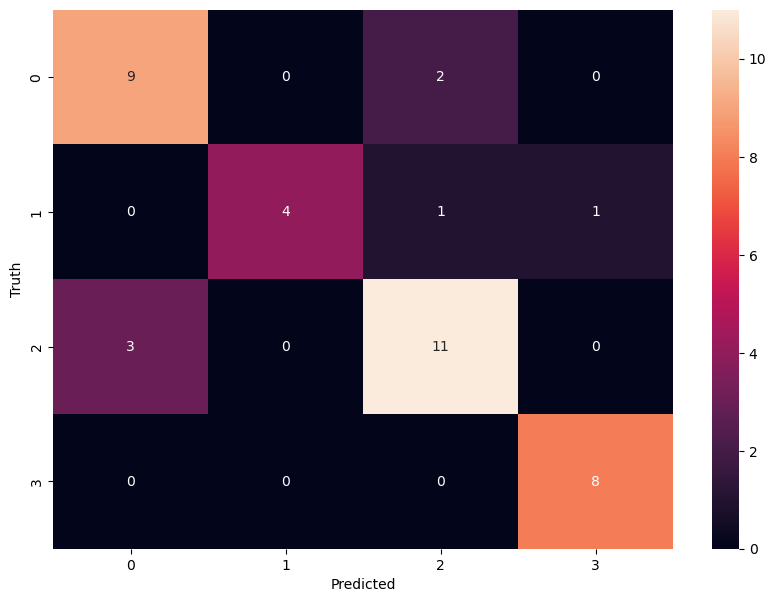

In [138]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [139]:
class_dict

{'mari_sharapova - Google Search': 0,
 'messi_leonel - Google Search': 1,
 'sarina_williams - Google Search': 2,
 'virat_kohli - Google Search': 3}

Saving the trained model

In [141]:
import joblib 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

Saving class dictionary

In [142]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))